In [2]:
from arcgis.gis import GIS
from IPython.display import display
import sys
sys.path.append("..")

from utilities import util

#Authenticate with AGOL
user = util.get_token('agol_creds.json')["username"]
password = util.get_token('agol_creds.json')["password"]
gis = GIS("https://www.arcgis.com", user, password)

<Item title:"Klamath County Mobile Home Park Inventory_dispatchers" type:Web Map owner:jsharrard3>
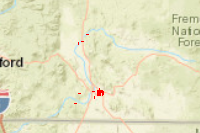

<Item title:"Klamath County Mobile Home Park Inventory" type:Workforce Project owner:jsharrard3>
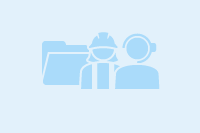

<Item title:"Parking Inventory" type:Web Map owner:astrong_pnw>
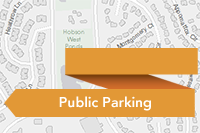

<Item title:"Klamath County Mobile Home Park Inventory_workers" type:Web Map owner:jsharrard3>
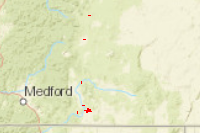

In [3]:
#print items
items = gis.content.search('Parking Inventory')
for item in items:
    display(item)

In [3]:
for item in items:
    print(item.id)

c481cf9b22d4487faf010e0f886bb8f7
dccfd3a551aa405799a180fc82f05d77
a19d6a0e34a4421bba5f15d95f28b722
91e435e3c9db41c7936daedd74debce6


In [4]:
for item in items:
    print(item.tags)

['workforce-dispatcher']
['workforce']
['python', 'api', 'is', 'awesome']
['workforce-worker']


<Item title:"Parking Inventory" type:Web Map owner:astrong_pnw>
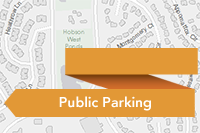

In [5]:
#access item
Parking_Map_Item = gis.content.get('a19d6a0e34a4421bba5f15d95f28b722')

#Display item
Parking_Map_Item

In [6]:
#update item tags
Parking_Map_Item.update(item_properties={'tags':'python, api, is, awesome'})

True

In [7]:
#Parking Layer
Parking_Layer = gis.content.get('d8c6ad6734d947a784942380b1fa835c')
feature_service = Parking_Layer.url
print(feature_service)

https://services.arcgis.com/2zRtyrQ6q4mGrLJK/arcgis/rest/services/ONSTREETPARKING/FeatureServer


In [8]:
import requests
import json

r = requests.get(feature_service + "?f=pjson")
data = r.json()
data_pretty = json.dumps(data, indent=2)
print(data_pretty)

{
  "currentVersion": 10.51,
  "serviceItemId": "d8c6ad6734d947a784942380b1fa835c",
  "serviceDescription": "street parking in sac",
  "hasVersionedData": false,
  "supportsDisconnectedEditing": false,
  "hasStaticData": false,
  "maxRecordCount": 2000,
  "supportedQueryFormats": "JSON",
  "supportsVCSProjection": false,
  "capabilities": "Create,Delete,Query,Update,Editing",
  "description": "",
  "copyrightText": "",
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  },
  "initialExtent": {
    "xmin": -13525688.494080944,
    "ymin": 4659839.05994861,
    "xmax": -13523427.360932752,
    "ymax": 4661555.596772602,
    "spatialReference": {
      "wkid": 102100,
      "latestWkid": 3857
    }
  },
  "fullExtent": {
    "xmin": -13530018.61531142,
    "ymin": 4647267.56965497,
    "xmax": -13512206.938615195,
    "ymax": 4664704.982430467,
    "spatialReference": {
      "wkid": 102100,
      "latestWkid": 3857
    }
  },
  "allowGeometryUpdates": true,
  "units": "e